# RFP: Maze Solvers

## Project Overview
You are invited to submit a proposal that answers the following question:

### What path will your elf take?

*Please submit your proposal by **2/11/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, use [Gymnasium](https://gymnasium.farama.org/) to set up a [Frozen Lake maze](https://gymnasium.farama.org/environments/toy_text/frozen_lake/) for your project. When you are done with the set up, describe the reward system you plan on using.

*Note, a level 5 maze is at least 10 x 10 cells large and contains at least five lake cells.*

In [1]:
# !pip install "gymnasium[toy-text]"

In [2]:
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import pandas as pd
import random

In [3]:
# Make maze
maze = [
    "SFFFFHFFHH",
    "FFFFFFFFFF",
    "FFFFFFFFFH",
    "FHFFFHFFFF",
    "FFFFFHHFFF",
    "HFHFFFFFHF",
    "FFFFFFFFHF",
    "FHFFFFFFFF",
    "FFHFFFFFGH",
    "FFHFFHHFFH"
]

env = gym.make('FrozenLake-v1', desc=maze, render_mode='rgb_array')
initial_state = env.reset()

num_states = env.observation_space.n
num_actions = env.action_space.n
q_table = [[0 for _ in range(num_actions)] for _ in range(num_states)]

alpha = 0.2
gamma = 0.9
epsilon = 1.0
epsilon_decay = 0.99
min_epsilon = 0.2

rewards = {
    'S': 0,
    'F': -1,
    'H': -10,
    'G': 10
}

<h4>Ice - Lose 5 points<br>
Empty space - None<br>
Big gift - Gain a hundred points, end game</h4>

### 2. Training Your Model
In the cell seen below, write the code you need to train a Q-Learning model. Display your final Q-table once you are done training your model.

*Note, level 5 work uses only the standard Python library and Pandas to train your Q-Learning model. A level 4 uses external libraries like Baseline3.*

In [4]:
# Train model here.
for episode in range(1001):
    state = env.reset()[0]
    terminated = False

    while not terminated:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = max(range(num_actions), key=lambda a: q_table[state][a])

        new_state, reward, terminated, truncated, info = env.step(action)

        row = new_state // len(maze[0])
        col = new_state % len(maze[0])
        tile_type = maze[row][col]

        reward = rewards.get(tile_type, 0)

        if tile_type in ['H', 'G']:
            terminated = True

        old_value = q_table[state][action]
        next_max = max(q_table[new_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state][action] = new_value

        state = new_state

    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    if episode % 100 == 0:
        print(f"Episode: {episode}, Epsilon: {epsilon:.2f}")

Episode: 0, Epsilon: 0.99
Episode: 100, Epsilon: 0.36
Episode: 200, Epsilon: 0.20
Episode: 300, Epsilon: 0.20
Episode: 400, Epsilon: 0.20
Episode: 500, Epsilon: 0.20
Episode: 600, Epsilon: 0.20
Episode: 700, Epsilon: 0.20
Episode: 800, Epsilon: 0.20
Episode: 900, Epsilon: 0.20
Episode: 1000, Epsilon: 0.20


In [5]:
df = pd.DataFrame(q_table, columns=["Left", "Down", "Right", "Up"])
df.head()

,Left,Down,Right,Up
0,-6.118079,-6.137171,-6.235920,-5.583612
1,-6.567885,-7.256864,-7.513179,-7.173853
2,-7.925393,-8.351232,-8.379766,-7.101201
3,-8.516048,-8.633544,-8.677915,-8.472767
4,-8.742863,-9.255543,-9.385594,-9.258555


In [6]:
# env.close()

### 3. Testing Your Model
In the cell seen below, write the code you need to test your Q-Learning model for **1000 episodes**. It is important to test your model for 1000 episodes so that we are all able to compare our results.

*Note, level 5 testing uses both a success rate and an average steps taken metric to evaluate your model. Level 4 uses one or the other.*

In [7]:
successes = 0
total_steps = 0

for episode in range(1000):
    state = env.reset()[0]
    terminated = False
    steps = 0

    while not terminated:
        action = max(range(num_actions), key=lambda a: q_table[state][a])

        new_state, reward, terminated, truncated, info = env.step(action)
        steps += 1

        if reward == 10:
            successes += 1
            break

        state = new_state

    total_steps += steps

success_rate = (successes / 1000) * 100
average_steps = total_steps / 1000

print(f"Success rate: {success_rate}%")
print(f"Average steps taken: {average_steps}")

Success rate: 0.0%
Average steps taken: 173.366


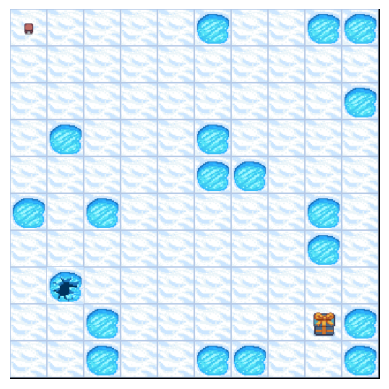

In [8]:
import matplotlib.pyplot as plt

observation = env.render()
plt.imshow(observation)
plt.axis('off')
plt.show()

### 4. Final Answer
In the first cell below, describe the path your elf takes to get to the gift. *Note, a level 5 answer includes a gif of the path your elf takes in order to reach the gift.*

In the second cell seen below, describe how well your Q-Learning model performed. Make sure that you explicitly name the **learning rate**, **the discount factor**, and the **reward system** that you used when training your final model. *Note, a level 5 description describes the model's performance using two types of quantitative evidence.*

![example image](https://gymnasium.farama.org/_images/frozen_lake.gif)

#### Describe the path your elf takes here.

#### Describe how well your Q-Learning model performed here.